In [1]:
import numpy as np
import pandas as pd

# two-class classification
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', dtype = None, delimiter=';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', dtype = None, delimiter=';')

print(data_red)
print(data_white)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [2]:
from sklearn.model_selection import train_test_split

X0 = data_red.to_numpy()
X1 = data_white.to_numpy()

N0,D = X0.shape
N1,D = X1.shape

# target value
t0 = np.zeros(N0, dtype = int)
t1 = np.ones(N1, dtype = int)

# 전체 dataset
X = np.vstack((X0, X1)) # input, 12차원의 입력
t = np.hstack((t0, t1)) # output, {0, 1} 구분, two-class

# normalization,
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)

N,D = X.shape
print(X.shape)

# 데이터 나누기
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.20)

# perceptron용 target value {-1, 1}
tp_train = np.copy(t_train) # 5197
tp_test = np.copy(t_test) # 1300
tp_train[np.where(tp_train == 0)] = -1 # tr_train == 0을 -1로 치환 
tp_test[np.where(tp_test == 0)] = -1

# 각 데이터의 샘플 숫자
N_train,D_train = X_train.shape # 5197,12
N_test,D_test = X_test.shape # 1300, 12
# accuracy
accuracy = np.zeros((4,2))

(6497, 12)


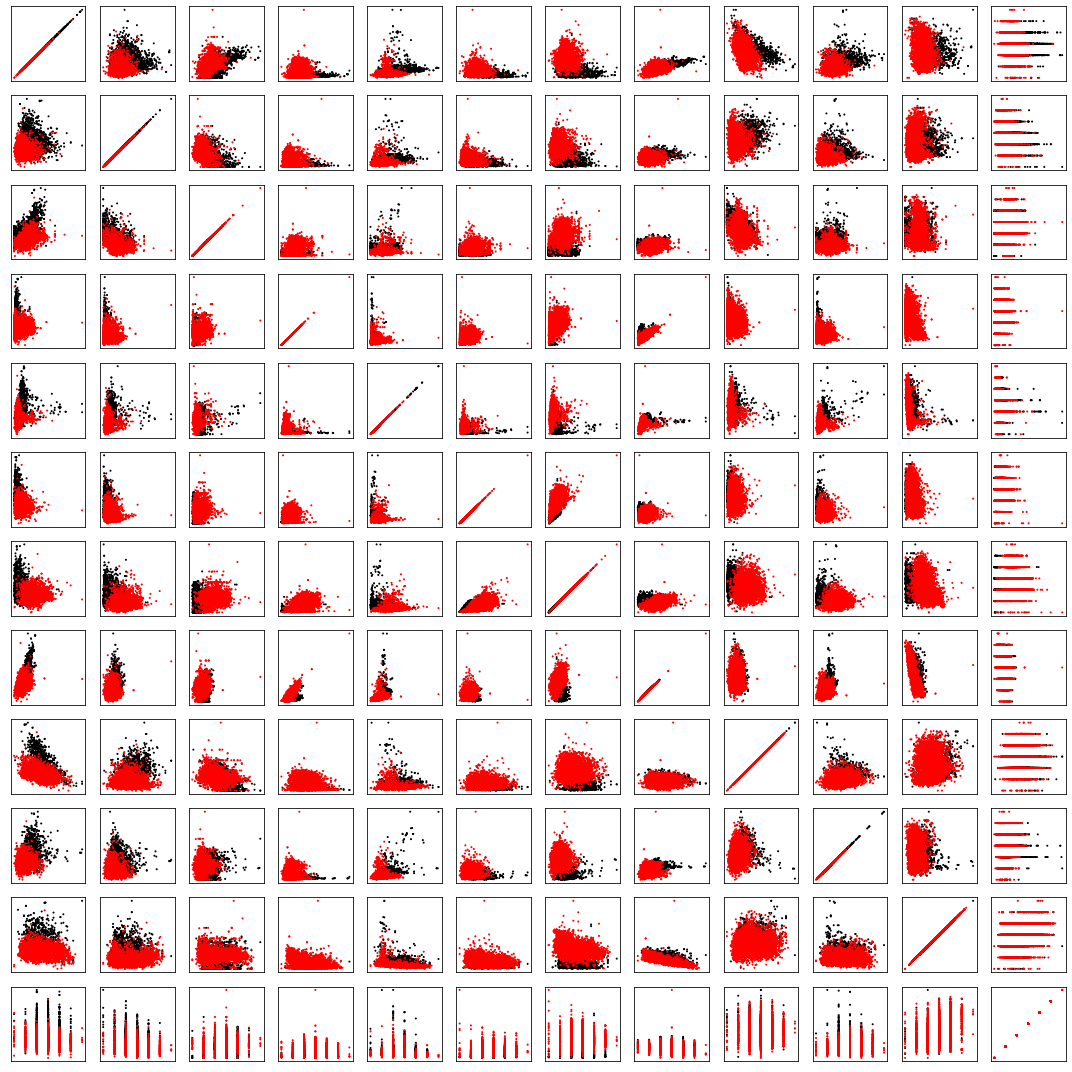

In [3]:
import matplotlib
import matplotlib.pyplot as plt

cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])

plt.figure(figsize = (15,15))
for i in range(0,D):
    for j in range(0,D):
        plt.subplot(D,D,i*D + j + 1)
        plt.scatter(X[:,i],X[:,j], c = t, s = 1, cmap = cmap_sample, vmin = 0,vmax = +1)

        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

plt.tight_layout()

In [4]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# sklearn-SVM
model1 = svm.SVC(kernel = 'rbf')
model1.fit(X_train,t_train)    
t1_train = model1.predict(X_train)
t1_test = model1.predict(X_test)

# sklearn-logistic
model2 = LogisticRegression()
model2.fit(X_train,t_train)
t2_train = model2.predict(X_train)
t2_test = model2.predict(X_test)

# accuracy
accuracy[0,0] = np.sum(t_train == t1_train) / N_train # sklearn-SVM, training
accuracy[1,0] = np.sum(t_train == t2_train) / N_train # sklearn-logistic, training
accuracy[0,1] = np.sum(t_test == t1_test) / N_test # sklearn-SVM, test
accuracy[1,1] = np.sum(t_test == t2_test) / N_test # sklearn-logistic, test

print(accuracy)

[[0.99634404 0.99384615]
 [0.9876852  0.98615385]
 [0.         0.        ]
 [0.         0.        ]]


# Logistic Regression

[[0.99634404 0.99384615]
 [0.9876852  0.98615385]
 [0.75370406 0.75461538]
 [0.         0.        ]]


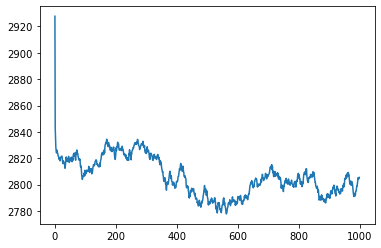

In [5]:
# logistic regression
def sigmoid(x):
    return .5 * (1 + np.tanh(.5 * x))

X_train = X_train.T
X_test = X_test.T

x1 = X_train[0,:]
x2 = X_train[1,:]
x3 = X_train[2,:]
x4 = X_train[3,:]
x5 = X_train[4,:]
x6 = X_train[5,:]
x7 = X_train[6,:]
x8 = X_train[7,:]
x9 = X_train[8,:]
x10 = X_train[9,:]
x11 = X_train[10,:]
x12 = X_train[11,:]

z1 = X_test[0,:]
z2 = X_test[1,:]
z3 = X_test[2,:]
z4 = X_test[3,:]
z5 = X_test[4,:]
z6 = X_test[5,:]
z7 = X_test[6,:]
z8 = X_test[7,:]
z9 = X_test[8,:]
z10 = X_test[9,:]
z11 = X_test[10,:]
z12 =X_test[11,:]

# initialize
eta = 0.001
maxIter = 1000

w = np.random.randn(13)
a_predict = (w[0]+w[1]*x1+w[2]*x2+w[3]*x3 + w[4]*x4+ w[5]*x5 + w[6]*x6+w[7]*x7+ w[8]*x8+ w[9]*x9+ w[10]*x10+ w[11]*x11+ w[12]*x12)
y_predict = sigmoid(a_predict)

misclass = np.where(y_predict!= t_train)
misclass = np.random.permutation(misclass[0])

cost = np.zeros(maxIter)
cost[:] = np.nan

# implement (training)
for iter in range(0,maxIter):
    misclass = np.random.permutation(misclass)

    w = w - eta*np.sum((y_predict - t_train)*np.vstack([np.ones((1,N_train)), x1[misclass].reshape(1,-1),x2[misclass].reshape(1,-1),x3[misclass].reshape(1,-1),\
                                                        x4[misclass].reshape(1,-1),x5[misclass].reshape(1,-1),x6[misclass].reshape(1,-1),x7[misclass].reshape(1,-1),\
                                                        x9[misclass].reshape(1,-1),x8[misclass].reshape(1,-1),x10[misclass].reshape(1,-1),x11[misclass].reshape(1,-1),\
                                                        x12[misclass].reshape(1,-1)]), axis = 1)

    a_predict = (w[0]+w[1]*x1+w[2]*x2+w[3]*x3+w[4]*x4+w[5]*x5+w[6]*x6+w[7]*x7+w[8]*x8+w[9]*x9+w[10]*x10+w[11]*x11+w[12]*x12)
    y_predict = sigmoid(a_predict)
    
    misclass = np.where(y_predict!= t_train)[0]    

    cost[iter] = -np.sum(t_train*np.log(y_predict[misclass]) + (1 - t_train)*np.log(1 - y_predict[misclass]))

    if misclass.size == 0:
        break
        
        
# test 
test_predict = (w[0]+w[1]*z1+w[2]*z2+w[3]*z3+w[4]*z4+w[5]*z5+w[6]*z6+w[7]*z7+w[8]*z8+w[9]*z9+w[10]*z10+w[11]*z11+w[12]*z12)
test_y = sigmoid(test_predict)

# accuracy
y_predict[np.where(y_predict >= 0.5)] = 1
y_predict[np.where(y_predict <= 0.5)] = 0

test_y[np.where(test_y >= 0.5)] = 1
test_y[np.where(test_y <= 0.5)] = 0

accuracy[2,0] = np.sum(t_train == y_predict) / N_train # numpy-logistic, training
accuracy[2,1] = np.sum(t_test == test_y) / N_test # numpy-logistic, test
print(accuracy)

plt.figure()
plt.plot(cost)

# Perceptron 

[[0.99634404 0.99384615]
 [0.9876852  0.98615385]
 [0.75370406 0.75461538]
 [0.66846257 0.67153846]]


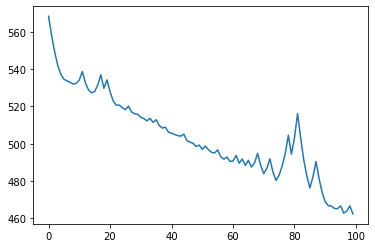

In [6]:
# numpy-perceptron
X_train = X_train.T
X_test = X_test.T

w = np.random.randn(13) # 12개의 hyperparameter
y_predict = (w[0]+w[1]*x1+w[2]*x2+w[3]*x3 + w[4]*x4+ w[5]*x5 + w[6]*x6+w[7]*x7+ w[8]*x8+ w[9]*x9+ w[10]*x10+ w[11]*x11+ w[12]*x12)

id_misclass = np.where(y_predict*tp_train < 0)
id_misclass = np.random.permutation(id_misclass[0])

eta = 0.01
maxIter = 100

cost = np.zeros(maxIter)
cost[:] = np.nan

for iter in range(0,maxIter):
    id_misclass = np.random.permutation(id_misclass)
    w = w + eta*np.array([1, x1[id_misclass[0]], x2[id_misclass[0]], x3[id_misclass[0]], x4[id_misclass[0]],x5[id_misclass[0]],\
                          x6[id_misclass[0]], x7[id_misclass[0]], x8[id_misclass[0]], x9[id_misclass[0]], x10[id_misclass[0]],\
                          x11[id_misclass[0]],x12[id_misclass[0]]])*tp_train[id_misclass[0]]
    y_predict = (w[0]+w[1]*x1+w[2]*x2+w[3]*x3 + w[4]*x4+ w[5]*x5 + w[6]*x6+w[7]*x7+ w[8]*x8+ w[9]*x9+ w[10]*x10+ w[11]*x11+ w[12]*x12)
    
    id_misclass = np.where(y_predict*tp_train < 0)[0]    
    cost[iter] = -np.sum(y_predict[id_misclass]*tp_train[id_misclass])    
    
    if id_misclass.size == 0:
        break

        
# test 
test_predict = (w[0]+w[1]*z1+w[2]*z2+w[3]*z3+w[4]*z4+w[5]*z5+w[6]*z6+w[7]*z7+w[8]*z8+w[9]*z9+w[10]*z10+w[11]*z11+w[12]*z12)

c1_train = np.where(y_predict >= 0)
c0_train = np.where(y_predict <= 0)

# accuracy
y_predict[np.where(y_predict <= 0)] = -1
y_predict[np.where(y_predict >= 0)] = 1

test_predict[np.where(test_predict <= 0)] = -1
test_predict[np.where(test_predict >= 0)] = 1

accuracy[3,0] = np.sum(tp_train == y_predict) / N_train  # numpy-perceptron, training
accuracy[3,1] = np.sum(tp_test == test_predict) / N_test # numpy-perceptron, test
print(accuracy)

plt.figure()
plt.plot(cost)

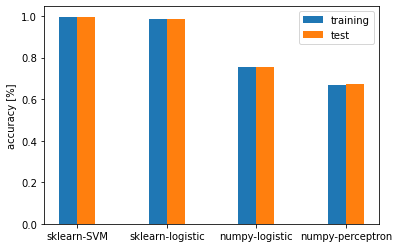

In [7]:
# bar plot
xloc = np.arange(4)
width = 0.2

plt.figure()
plt.bar(xloc - 0.5*width, accuracy[:,0], width)
plt.bar(xloc + 0.5*width, accuracy[:,1], width)
plt.xticks(xloc,['sklearn-SVM','sklearn-logistic','numpy-logistic','numpy-perceptron'])
plt.ylabel('accuracy [%]')
plt.legend(['training','test'])